In [1]:
import numpy as np 
import pandas as pd 
import pymongo
from pymongo import MongoClient
from subprocess import check_output

In [2]:
connection = pymongo.MongoClient("localhost",27017)
db = connection["Sample2"]
collection = db["Data"]
print("connect to mongoDB")
tweets = pd.DataFrame(collection.find())
#df.to_csv('file1.csv')
tweets.head()

connect to mongoDB


,_id,Text,date,Location,User_followers,favourites_count,retweet_count,Verified User
0,6005372e28cba40ce364d0bc,Ajith Starrer Valimai Is Expected To Create ...,2021-01-14,Twitter,91,4154,0,False
1,6005372e28cba40ce364d0bd,Powerful edit,2021-01-14,"Aurangabad, India",803,12989,0,False
2,6005372e28cba40ce364d0be,"watch it 👀\nplease like 👍, share and do subscr...",2021-01-14,"Bengaluru, India",25,67,0,False
3,6005372e28cba40ce364d0bf,Cigarette scene Is starrer KGF 2 in trouble? ...,2021-01-14,"Mumbai, India",10124,9125,0,False
4,6005372e28cba40ce364d0c0,Then how can this be possible...\n,2021-01-14,unknown,1404,17010,0,False


In [3]:
tweets=tweets.drop(columns=['date','Location','User_followers','favourites_count','retweet_count','Verified User'],axis=1)
tweets.tail()

,_id,Text
3800,6005372e28cba40ce364df94,Monday 10Am \nSomething posting Be Ready Guy...
3801,6005372e28cba40ce364df95,OMG! 😱🤩 kgf2 Star Yash 🤩 and Baahubali in ...
3802,6005372e28cba40ce364df96,"""When Pan Indian films like Master, KGF, Baa..."
3803,6005372e28cba40ce364df97,BAHUBALI 2 trailer 11 cr views in 3 YEARS RR...
3804,6005372e28cba40ce364df98,Frames of Prabhas and Rocking Star at Salaa...


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk import tokenize
import string

sid = SentimentIntensityAnalyzer()

tweets['cleaned_text'] = tweets.Text.apply(lambda x:x.lower())
tweets['cleaned_text'] = tweets.Text.apply(lambda x:x.translate(str.maketrans('', '', string.punctuation)))   #Remove Punctuations


tweets['sentiment_compound_polarity']=tweets.cleaned_text.apply(lambda x:sid.polarity_scores(x)['compound'])

tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          3805 non-null   object 
 1   Text                         3805 non-null   object 
 2   cleaned_text                 3805 non-null   object 
 3   sentiment_compound_polarity  3805 non-null   float64
 4   sentiment_type               3805 non-null   object 
dtypes: float64(1), object(4)
memory usage: 148.8+ KB


In [7]:
#Check sentiment of a statement
a="this was not a good movie at all"
b=sid.polarity_scores(a)
if b['compound']>0:
    sentiment_type="POSITIVE"
elif b['compound']>=0:
    sentiment_type='POSITIVE'
else:
     sentiment_type='NEGATIVE'
        
print(a,":",sentiment_type)

this was not a good movie at all : NEGATIVE


In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
tweets['word count'] = tweets['cleaned_text'].apply(word_count)
tweets.head(3)

,_id,Text,cleaned_text,sentiment_compound_polarity,sentiment_type,word count
0,6005372e28cba40ce364d0bc,Ajith Starrer Valimai Is Expected To Create ...,Ajith Starrer Valimai Is Expected To Create ...,0.8807,POSITIVE,21
1,6005372e28cba40ce364d0bd,Powerful edit,Powerful edit,0.4215,POSITIVE,2
2,6005372e28cba40ce364d0be,"watch it 👀\nplease like 👍, share and do subscr...",watch it 👀\nplease like 👍 share and do subscri...,0.8542,POSITIVE,18


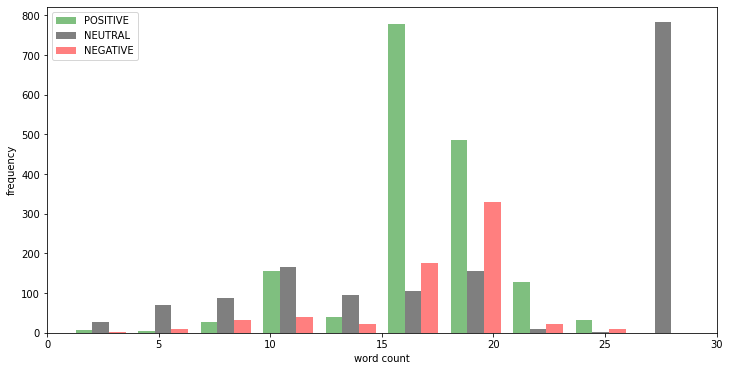

In [27]:
import matplotlib.pyplot as plt
x = tweets['word count'][tweets.sentiment_type == 'POSITIVE']
y = tweets['word count'][tweets.sentiment_type == 'NEUTRAL']
z = tweets['word count'][tweets.sentiment_type == 'NEGATIVE']
plt.figure(figsize=(12,6))
plt.xlim(0,30)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y, z], color=['green','black','red'], alpha=0.5, label=['POSITIVE','NEUTRAL','NEGATIVE'])
plt.legend(loc='upper left')

<AxesSubplot:title={'center':'sentiment analysis'}, ylabel='sentiment_type'>

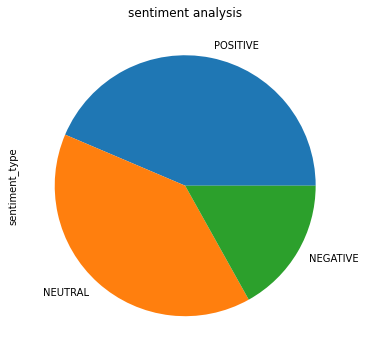

In [32]:
tweets.sentiment_type.value_counts().plot(kind='pie',title="sentiment analysis",figsize=(6,6))


<AxesSubplot:title={'center':'sentiment analysis'}>

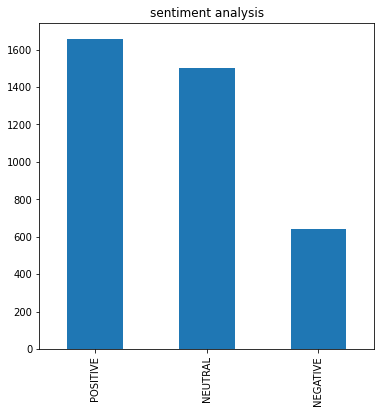

In [33]:
tweets.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis",figsize=(6,6))

In [34]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('stopwords')
def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",tweet) 
    tokens = nltk.word_tokenize(only_letters)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
normalizer("I am so excited t thisabou Movie.")

['excited', 'movie']

In [37]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
tweets['normalized_tweet'] = tweets.Text.apply(normalizer)
tweets[['Text','normalized_tweet']].head()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Text,normalized_tweet
0,Ajith Starrer Valimai Is Expected To Create The Same Impact That Kgf Created All Over India.\n\nVinoth Is Super Confident. T…,"[valimai, expected, create, impact, kgf, created, india, vinoth, super, confident]"
1,Powerful edit,[]
2,"watch it 👀\nplease like 👍, share and do subscribe for more videos YouTube Friends BestFriend KicchaSudeep KGF…","[please, like, share, subscribe, video, youtube, friend, bestfriend, kicchasudeep, kgf]"
3,Cigarette scene Is starrer KGF 2 in trouble? Follow Us on \n\n KGF2 KGF2cigarettescene…,"[starrer, kgf, trouble, follow, u, kgf, kgf, cigarettescene]"
4,Then how can this be possible...\n,[possible]


In [48]:
tweets.tail(1)

,_id,Text,cleaned_text,sentiment_compound_polarity,sentiment_type,word count,normalized_tweet
3804,6005372e28cba40ce364df98,Frames of Prabhas and Rocking Star at Salaar launch ❤️\n\nSalaarSagaBegins 💥\n\n Y…,Frames of Prabhas and Rocking Star at Salaar launch ❤️\n\nSalaarSagaBegins 💥\n\n Y…,0.0,NEUTRAL,13,"[prabhas, rocking, star, salaar, launch, salaarsagabegins]"


In [40]:
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(analyzer='word',ngram_range=(2,2))

In [41]:
vectorized_data = count_vectorizer.fit_transform(tweets.Text)
indexed_data = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))


In [42]:
##TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(2, 2))
vectorizer.fit(tweets.Text)
vector = vectorizer.transform(tweets.Text)
#print(vector)
print(type(vector))
indexed_data = hstack((np.array(range(0,vector.shape[0]))[:,None], vector))
print(vectorizer.idf_)

<class 'scipy.sparse.csr.csr_matrix'>
[8.55118687 8.55118687 8.14572176 ... 8.55118687 8.55118687 8.55118687]


In [43]:
def sentiment2target(sentiment):
    return {
        'NEGATIVE': 0,
        'NEUTRAL': 1,
        'POSITIVE' : 2
    }[sentiment]
targets = tweets.sentiment_type.apply(sentiment2target)


In [44]:
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(indexed_data, targets, test_size=0.4, random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [45]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(data_train, targets_train)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(targets_test,predictions))
print(classification_report(targets_test,predictions))
print(accuracy_score(targets_test, predictions))

[[227  30   0]
 [  1 594   0]
 [  1  60 609]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       257
           1       0.87      1.00      0.93       595
           2       1.00      0.91      0.95       670

    accuracy                           0.94      1522
   macro avg       0.95      0.93      0.94      1522
weighted avg       0.95      0.94      0.94      1522

0.9395532194480947


In [50]:
clf.score(data_test, targets_test)

0.9395532194480947

In [71]:
#Saving the model SVM
from sklearn import externals
import joblib
# Save the model as a pickle in a file 
joblib.dump(clf, 'SVM_model.pkl') 

['SVM_model.pkl']

In [72]:
# Load the model from the file 
knn_from_joblib = joblib.load('SVM_model.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(data_test) 

array([1, 1, 1, ..., 0, 0, 2], dtype=int64)

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_jobs=2, random_state=45)
clf1.fit(data_train, targets_train)
clf1.score(data_test, targets_test)

0.9415243101182654

In [53]:
print(confusion_matrix(targets_test,predictions))
print(classification_report(targets_test,predictions))
print(accuracy_score(targets_test, predictions))

[[232  25   0]
 [  1 594   0]
 [  4  59 607]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       257
           1       0.88      1.00      0.93       595
           2       1.00      0.91      0.95       670

    accuracy                           0.94      1522
   macro avg       0.95      0.94      0.94      1522
weighted avg       0.95      0.94      0.94      1522

0.9415243101182654


In [73]:
#Saving the model randomForest
from sklearn import externals
import joblib
# Save the model as a pickle in a file 
joblib.dump(clf1, 'RandomForest.pkl') 

['RandomForest.pkl']

In [74]:
# Load the model from the file 
knn_from_joblib = joblib.load('RandomForest.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(data_test) 

array([1, 1, 1, ..., 0, 0, 2], dtype=int64)

In [76]:
sentences = count_vectorizer.transform([
    "its my pleasure to watch this movie",
    "i love this teaser",
    "yash is powerful star i love him",
    ""
])
clf.predict_proba(sentences)

array([[0.07912968, 0.01720402, 0.9036663 ],
       [0.02186644, 0.92710297, 0.05103059],
       [0.14886994, 0.83164494, 0.01948512],
       [0.02186644, 0.92710297, 0.05103059]])

In [77]:
sentences = count_vectorizer.transform(["not really liked it"])
clf.predict_proba(sentences)

array([[0.02186644, 0.92710297, 0.05103059]])

In [ ]:
predictions_on_test_data = clf.predict_proba(data_test)
index = np.transpose(np.array([range(0,len(predictions_on_test_data))]))
indexed_predictions = np.concatenate((predictions_on_test_data, index), axis=1).tolist()